In [64]:
import os
import requests
from datetime import datetime
import re
import json  # Para exportar el resumen
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import time
import numpy as np


# DATA GINI, THEIL POR AÑO Y DEPARTAMENTOS
---


In [65]:
directorio='C:/Users/FERNANDO/Documents/PI_INEQUIDAD/scripts_data/data/outputs/gini'
os.chdir(directorio)


### CADA EXCEL EN LA CARPETA CONTIENE
---
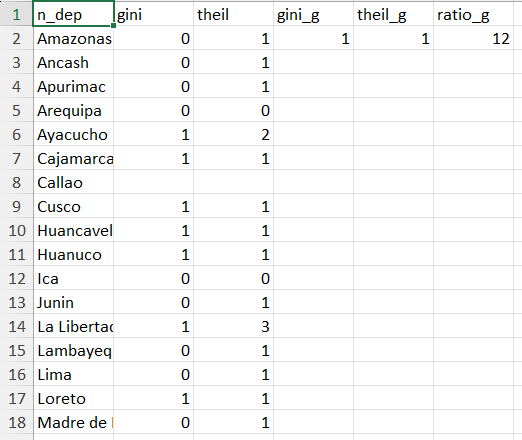

##### n_dep = nombre del departamento
##### gini = gini x departamento
##### theil = theil x departamento
##### gini_g = gini del año 
##### theil_g = theil del año
##### ratio_g = p90/p10

In [66]:
# ESTA CELDA MUESTRA QUE SUCEDE POR CADA ITERACIÓN
año=2007
nom_doc='gini_'+str(año)+'.xlsx'
dic_anual={}
dt=pd.read_excel(nom_doc)
# INDICADORES ANUALES
# ESTOS SE CONCATENARAN POR AÑOS
ind_anuales=dt.iloc[0,[3,4,5]]
#ind_anuales=ind_anuales.tolist()
dic_anual[año]=ind_anuales.tolist()
print(ind_anuales)
# DATAS INICIALES
dt_gini=dt.iloc[:,[0,1]]
dt_gini=dt_gini.rename(columns={"gini":str(año)})
dt_theil=dt.iloc[:,[0,2]]
dt_theil=dt_theil.rename(columns={"theil":str(año)})

gini_g      0.519087
theil_g     1.181512
ratio_g    12.231634
Name: 0, dtype: object


In [67]:
años=np.linspace(2008,2023,(2024-2008))
años=años.tolist()

for elem in años:
    año=int(elem)
    nom_doc='gini_'+str(año)+'.xlsx'
    dt=pd.read_excel(nom_doc)
    # INDICADORES ANUALES
    # ESTOS SE CONCATENARAN POR AÑOS
    ind_anuales=dt.iloc[0,[3,4,5]]
    #ind_anuales=ind_anuales.tolist()
    # SE HACEUN APPEND AL DICCIONARIO DE VALORES ANUALES
    #print(ind_anuales)
    dic_anual[año]=ind_anuales.tolist()
    # DATAS INICIALES
    dt_gini_1=dt.iloc[:,[1]]
    dt_gini_1 = dt_gini_1.rename(columns={"gini": str(año)})
    dt_gini = pd.concat([dt_gini, dt_gini_1], axis=1)
    dt_theil_1=dt.iloc[:,[2]]
    dt_theil_1 = dt_theil_1.rename(columns={"theil": str(año)})
    dt_theil = pd.concat([dt_theil, dt_theil_1], axis=1)



In [68]:
dt_theil.dropna()

,n_dep,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Amazonas,0.784171,0.769976,0.829048,1.550567,0.539151,0.504264,0.605240,0.685202,0.797151,0.659964,0.482163,0.580531,0.488255,0.576244,0.508187,0.600582,0.414336
1,Ancash,0.757770,0.535150,0.624979,0.729829,0.571603,0.440024,0.597406,0.461342,0.389181,0.442339,0.497556,0.455056,0.338173,0.518829,0.515043,0.712672,0.373166
2,Apurimac,1.061812,0.791452,0.746235,0.483164,0.593327,0.429825,0.454116,0.447713,0.819977,0.525859,0.385243,0.387665,0.423024,0.559396,0.340197,0.429424,0.433987
3,Arequipa,0.496834,0.444073,0.467218,0.568356,0.596286,0.467027,0.307793,0.385109,0.372204,0.380166,0.265869,0.345230,0.265961,0.465292,0.353184,0.475179,0.443415
4,Ayacucho,1.670162,0.650028,0.597708,0.541747,1.136303,0.632701,0.608274,0.690172,0.883347,0.586409,0.519231,0.497212,0.534044,1.723961,0.448646,0.532101,0.484693
5,Cajamarca,1.060615,1.387248,0.786429,1.102486,1.077177,0.979366,0.983205,0.803089,0.925019,0.785487,0.728364,0.576261,0.581974,0.633481,0.827526,0.520760,0.515873
7,Cusco,0.676890,0.811060,0.697256,0.705807,0.587674,0.420121,0.429140,0.617840,0.460915,0.537924,0.495070,0.450826,0.454654,0.513428,0.377419,0.371016,0.344852
8,Huancavelica,1.228168,1.417862,1.750904,1.154683,1.098629,0.930577,1.104719,0.719640,0.475793,0.437295,0.391578,0.399081,0.487860,0.484494,0.307829,0.411371,0.370561
9,Huanuco,1.208668,0.911007,0.739689,0.761662,1.416523,0.999010,0.918780,0.735858,0.750040,0.769182,0.739123,0.646570,0.692592,0.675933,0.677518,0.600484,0.642827
10,Ica,0.326873,0.322373,0.356480,0.254389,0.261394,0.219072,0.173886,0.188801,0.263119,0.165479,0.152363,0.145852,0.153569,0.231432,0.221441,0.295406,0.274431


In [69]:
dt_gini.dropna()

,n_dep,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Amazonas,0.496523,0.486979,0.507760,0.499577,0.459978,0.466411,0.485001,0.459599,0.461243,0.459264,0.432439,0.439874,0.422239,0.445360,0.420957,0.427928,0.411406
1,Ancash,0.466020,0.463123,0.424771,0.457060,0.457091,0.432645,0.435707,0.423733,0.404619,0.418699,0.424683,0.398230,0.378272,0.442882,0.401032,0.413381,0.394664
2,Apurimac,0.493475,0.477636,0.455886,0.448068,0.469387,0.440582,0.426739,0.425905,0.438732,0.400343,0.401093,0.386057,0.390509,0.419592,0.369415,0.396093,0.414437
3,Arequipa,0.447193,0.432506,0.429576,0.423296,0.394458,0.406217,0.366182,0.380261,0.363336,0.382677,0.348394,0.378573,0.347465,0.430205,0.362627,0.409680,0.379196
4,Ayacucho,0.502185,0.464874,0.465202,0.456596,0.511097,0.460689,0.462558,0.452025,0.461381,0.449305,0.440328,0.437257,0.440841,0.496409,0.410105,0.430354,0.433926
5,Cajamarca,0.527861,0.545898,0.521282,0.538337,0.539714,0.530183,0.531990,0.492953,0.506699,0.490400,0.492578,0.462340,0.460996,0.447672,0.476184,0.437549,0.431847
7,Cusco,0.515760,0.502759,0.497619,0.482549,0.463036,0.433576,0.436041,0.464456,0.422043,0.450908,0.449805,0.444777,0.432966,0.436548,0.391561,0.384825,0.384166
8,Huancavelica,0.531643,0.515634,0.516723,0.503615,0.485395,0.489539,0.476524,0.437942,0.408678,0.412279,0.390291,0.393309,0.385621,0.407112,0.354933,0.370130,0.389916
9,Huanuco,0.519206,0.504657,0.471615,0.494467,0.513356,0.525637,0.507260,0.470479,0.477433,0.469941,0.470140,0.443332,0.447418,0.472553,0.439707,0.437625,0.440399
10,Ica,0.334148,0.330793,0.336791,0.317325,0.320365,0.291310,0.274669,0.279762,0.297767,0.271169,0.264787,0.256479,0.258679,0.324845,0.304629,0.304563,0.310133


In [70]:
anual = pd.DataFrame(dic_anual).T  # Transponemos para que los años sean filas
anual.index.name = 'AÑO'
anual.columns = ['GINI', 'THEIL', 'RATIO']
anual = anual.reset_index()
print(anual)

     AÑO      GINI     THEIL      RATIO
0   2007  0.519087  1.181512  12.231634
1   2008  0.494345  0.928042  11.363573
2   2009  0.491282  0.859835  10.502251
3   2010  0.473885  0.824990   9.527696
4   2011  0.464797  0.731833   9.260605
5   2012  0.462460  0.674119   9.461506
6   2013  0.457068  0.685096   8.972748
7   2014  0.453097  0.694098   8.745442
8   2015  0.453178  0.648949   8.588745
9   2016  0.455210  0.661081   8.744960
10  2017  0.451142  0.638285   8.561562
11  2018  0.441264  0.529309   8.098099
12  2019  0.432147  0.522807   7.623444
13  2020  0.461358  0.663789   8.726499
14  2021  0.420836  0.517336   6.653445
15  2022  0.424921  0.539867   6.820139
16  2023  0.423274  0.498380   7.037229


In [71]:
directorio='C:/Users/FERNANDO/Documents/PI_INEQUIDAD/scripts_data/data/outputs/gini/consolidado'
os.chdir(directorio)
dt_gini.to_excel('gini_regiones.xlsx',index=False)
dt_theil.to_excel('theil_regiones.xlsx',index=False)
anual.to_excel('indicadores_año_país.xlsx',index=False)

